In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

In [2]:
filepath = '~/realec_72.csv'

In [3]:
data = pd.read_csv(filepath, delimiter=';').sample(frac=1).dropna()
data

,name,CEFR,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,...,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,punct_mistakes_pp,punct_mistakes_because,punct_mistakes_but,punct_mistakes_compare,million_mistake,side_mistake
729,EPa_20_1.txt,B1,5.142857,12,2,0,3,3,7,128,...,0,0,0,3,0,1,0,0,0,0
599,DZu_25_1.txt,B1-B2,5.142857,8,3,0,0,5,7,160,...,8,0,0,2,0,1,0,0,0,0
1010,MGr_25_1.txt,B1-B2,5.666667,10,3,4,2,6,9,235,...,4,0,2,10,0,0,0,0,0,0
517,ASt_28_1.txt,B1-B2,3.727273,5,2,1,0,0,11,178,...,4,0,0,3,0,0,0,0,1,0
593,DZu_22_1.txt,B1,5.285714,10,2,1,3,2,7,185,...,1,1,0,5,0,0,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,ADe_11_2.txt,B1,4.916667,9,0,4,3,7,12,272,...,0,0,4,2,0,0,0,0,0,0
503,AMe_9_2.txt,B1,4.333333,7,3,0,3,2,15,285,...,5,2,1,10,0,0,2,0,0,0
56,ASt_37_1.txt,A2-B1,5.181818,10,3,3,4,1,11,226,...,5,1,1,3,0,0,0,0,1,0
1144,VPe_22_1.txt,B1-B2,5.300000,8,4,4,2,7,10,247,...,4,1,0,0,0,0,0,0,0,0


In [4]:
data.columns[2:64]

Index(['av_depth', 'max_depth', 'min_depth', 'num_acl', 'num_rel_cl',
       'num_advcl', 'num_sent', 'num_tok', 'av_tok_before_root', 'av_len_sent',
       'num_cl', 'num_tu', 'num_compl_tu', 'num_coord', 'num_poss', 'num_prep',
       'num_adj_noun', 'num_part_noun', 'num_noun_inf', 'pos_sim_nei',
       'lemma_sim_nei', 'pos_sim_all', 'lemma_sim_all', 'density', 'ls', 'vs',
       'corrected_vs', 'squared_vs', 'lfp_1000', 'lfp_2000', 'lfp_uwl',
       'lfp_rest', 'ndw', 'ttr', 'corrected_ttr', 'root_ttr', 'log_ttr',
       'uber_ttr', 'd', 'lv', 'vvi', 'squared_vv', 'corrected_vv', 'vvii',
       'nv', 'adjv', 'advv', 'modv', 'der_level3', 'der_level4', 'der_level5',
       'der_level6', 'mci', 'freq_finite_forms', 'freq_aux', 'num_inf',
       'num_gerunds', 'num_pres_sing', 'num_pres_plur', 'num_past_part',
       'num_past_simple', 'num_linkings'],
      dtype='object')

In [5]:
train = data.iloc[:int(1172*0.75)]
test = data.iloc[int(1172*0.75):]

In [6]:
test


,name,CEFR,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,...,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,punct_mistakes_pp,punct_mistakes_because,punct_mistakes_but,punct_mistakes_compare,million_mistake,side_mistake
161,ESha_33_2.txt,B1,4.933333,10,0,4,4,7,15,307,...,4,0,3,4,0,0,1,0,0,0
947,KKo_24_2.txt,C1,5.454545,13,2,5,5,9,11,329,...,5,1,3,1,1,1,3,0,0,0
490,AMe_2_2.txt,A2-B1,6.166667,13,3,9,2,4,12,260,...,7,2,6,11,0,0,0,0,0,0
280,VPe_15_1.txt,B1-B2,4.500000,8,2,0,8,0,12,218,...,5,0,1,0,0,0,1,0,0,0
491,AMe_20_1.txt,B1,4.166667,8,2,0,0,0,12,176,...,2,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,AAl_25_1.txt,B1,4.846154,12,2,3,3,2,13,220,...,1,0,1,1,0,0,2,0,0,0
735,EPa_23_1.txt,A2-B1,3.166667,5,1,1,1,1,12,165,...,2,0,0,5,0,0,0,0,0,0
246,TSha_15_2.txt,B2,5.000000,9,0,6,2,3,14,295,...,13,3,4,3,0,0,0,0,0,0
330,ZEv_16_2.txt,B2,5.157895,10,3,9,6,9,19,367,...,2,0,6,7,2,1,0,0,0,0


In [7]:
target = train[data.columns[1:2]]

X = train[data.columns[2:]]

In [8]:
target_test = test[data.columns[1:2]]

X_test = test[data.columns[2:]]

In [9]:
from catboost import CatBoostClassifier

In [10]:
classifier = CatBoostClassifier()

In [11]:
classifier.fit(X, target, eval_set=(X_test, target_test))

Learning rate set to 0.107698
0:	learn: 1.8752071	test: 1.8844282	best: 1.8844282 (0)	total: 114ms	remaining: 1m 53s
1:	learn: 1.8194746	test: 1.8406132	best: 1.8406132 (1)	total: 153ms	remaining: 1m 16s
2:	learn: 1.7648485	test: 1.7974918	best: 1.7974918 (2)	total: 192ms	remaining: 1m 3s
3:	learn: 1.7190271	test: 1.7583177	best: 1.7583177 (3)	total: 239ms	remaining: 59.6s
4:	learn: 1.6796108	test: 1.7239207	best: 1.7239207 (4)	total: 281ms	remaining: 56s
5:	learn: 1.6426115	test: 1.7005832	best: 1.7005832 (5)	total: 330ms	remaining: 54.6s
6:	learn: 1.6093538	test: 1.6792542	best: 1.6792542 (6)	total: 370ms	remaining: 52.5s
7:	learn: 1.5750292	test: 1.6568471	best: 1.6568471 (7)	total: 456ms	remaining: 56.6s
8:	learn: 1.5482959	test: 1.6331945	best: 1.6331945 (8)	total: 502ms	remaining: 55.3s
9:	learn: 1.5231044	test: 1.6141452	best: 1.6141452 (9)	total: 542ms	remaining: 53.7s
10:	learn: 1.4993615	test: 1.5996562	best: 1.5996562 (10)	total: 581ms	remaining: 52.3s
11:	learn: 1.4757939	t

In [12]:
classifier.score(X_test, target_test)

0.37542662116040953

In [5]:
import matplotlib.pyplot as plt

In [14]:
list(data.columns)

['name',
 'CEFR',
 'av_depth',
 'max_depth',
 'min_depth',
 'num_acl',
 'num_rel_cl',
 'num_advcl',
 'num_sent',
 'num_tok',
 'av_tok_before_root',
 'av_len_sent',
 'num_cl',
 'num_tu',
 'num_compl_tu',
 'num_coord',
 'num_poss',
 'num_prep',
 'num_adj_noun',
 'num_part_noun',
 'num_noun_inf',
 'pos_sim_nei',
 'lemma_sim_nei',
 'pos_sim_all',
 'lemma_sim_all',
 'density',
 'ls',
 'vs',
 'corrected_vs',
 'squared_vs',
 'lfp_1000',
 'lfp_2000',
 'lfp_uwl',
 'lfp_rest',
 'ndw',
 'ttr',
 'corrected_ttr',
 'root_ttr',
 'log_ttr',
 'uber_ttr',
 'd',
 'lv',
 'vvi',
 'squared_vv',
 'corrected_vv',
 'vvii',
 'nv',
 'adjv',
 'advv',
 'modv',
 'der_level3',
 'der_level4',
 'der_level5',
 'der_level6',
 'mci',
 'freq_finite_forms',
 'freq_aux',
 'num_inf',
 'num_gerunds',
 'num_pres_sing',
 'num_pres_plur',
 'num_past_part',
 'num_past_simple',
 'num_linkings',
 'num_4grams',
 'num_func_ngrams',
 'num_shell_noun',
 'num_misspelled_tokens',
 'punct_mistakes_pp',
 'punct_mistakes_because',
 'punct_m

<BarContainer object of 72 artists>

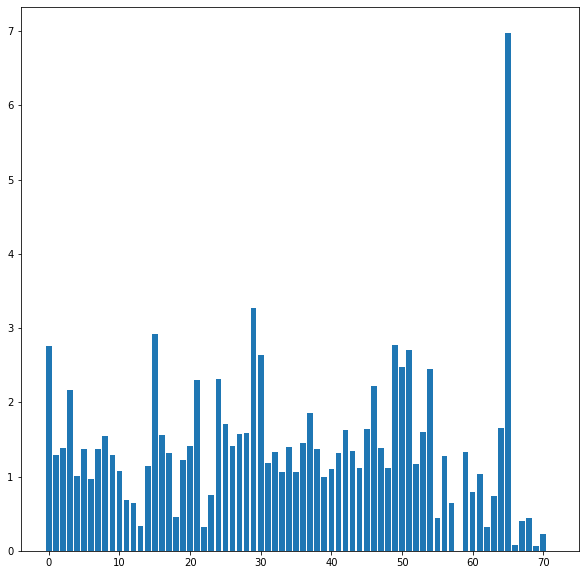

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(range(72), classifier.get_feature_importance()) 
# ax.set_xticklabels(list(data.columns)[2:], rotation=90, ha='right')



In [6]:
import numpy as np

In [17]:
data.columns[np.argmax(classifier.get_feature_importance())]

'num_func_ngrams'

In [18]:
import umap

In [19]:
reducer = umap.UMAP()

In [20]:
X = data[data.columns[2:]]
y = data[data.columns[:2]]

In [21]:
LEVELS = {}
for i, item in enumerate(y.CEFR.drop_duplicates()):
    LEVELS[item] = i


In [22]:
LEVELS

{'B1': 0, 'B2': 1, 'A2-B1': 2, 'B1-B2': 3, 'B2-C1': 4, 'C1': 5, 'A2': 6}

In [23]:
_y = y[['CEFR']].replace(LEVELS)

In [24]:
scaled_data = StandardScaler().fit_transform(X)

In [25]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(1172, 2)

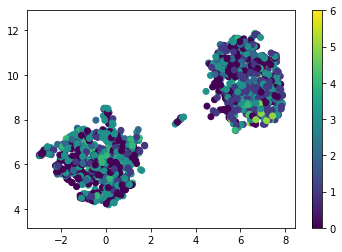

In [26]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=_y.values
)
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')

In [27]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

In [45]:
components.shape

(1172, 3)

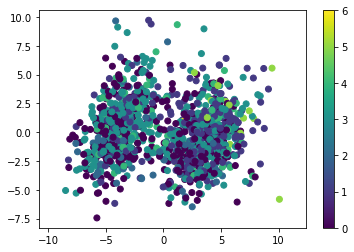

In [50]:
plt.scatter(
    components[:, 0],
    components[:, 1],
    c=_y.values
)
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')

In [4]:
data.size

86728

In [6]:
data.describe()

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,num_4grams,num_func_ngrams,num_shell_noun,num_misspelled_tokens,punct_mistakes_pp,punct_mistakes_because,punct_mistakes_but,punct_mistakes_compare,million_mistake,side_mistake
count,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,...,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.000000,1172.0
mean,4.559735,7.853242,1.964164,3.210751,2.409556,4.511092,12.602389,259.907850,6.149766,21.434316,...,6.866041,1.331058,1.725256,4.818259,0.155290,0.269625,0.559727,0.054608,0.186860,0.0
std,0.766205,1.789226,1.229614,2.420547,2.183592,3.463221,4.172489,69.678327,1.964774,4.431633,...,5.562621,1.538448,2.003313,3.487968,0.429224,0.619081,0.885802,0.258923,0.903583,0.0
min,2.652174,4.000000,0.000000,0.000000,0.000000,0.000000,4.000000,81.000000,1.600000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.000000,7.000000,1.000000,1.000000,1.000000,2.000000,9.000000,201.750000,4.769231,18.222222,...,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,4.500000,8.000000,2.000000,3.000000,2.000000,4.000000,12.000000,260.000000,5.904762,21.071429,...,6.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5.014706,9.000000,3.000000,5.000000,4.000000,7.000000,15.000000,307.250000,7.169118,23.909091,...,10.000000,2.000000,3.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,8.142857,16.000000,7.000000,14.000000,13.000000,21.000000,35.000000,589.000000,19.666667,41.000000,...,41.000000,13.000000,12.000000,34.000000,4.000000,5.000000,5.000000,3.000000,10.000000,0.0


In [7]:
import plotly.express as px

In [8]:
corrMatrix = data.corr()
print(corrMatrix)

                        av_depth  max_depth  min_depth   num_acl  num_rel_cl  \
av_depth                1.000000   0.577352   0.521841  0.251211    0.215556   
max_depth               0.577352   1.000000  -0.012873  0.308440    0.346980   
min_depth               0.521841  -0.012873   1.000000 -0.088988   -0.136382   
num_acl                 0.251211   0.308440  -0.088988  1.000000    0.131976   
num_rel_cl              0.215556   0.346980  -0.136382  0.131976    1.000000   
...                          ...        ...        ...       ...         ...   
punct_mistakes_because  0.014398   0.113620  -0.161180  0.077163    0.117235   
punct_mistakes_but     -0.060693   0.022777  -0.108583  0.025788    0.072994   
punct_mistakes_compare -0.039077  -0.049047  -0.015306 -0.019741    0.029889   
million_mistake         0.034275  -0.048522   0.122861 -0.058627   -0.011120   
side_mistake                 NaN        NaN        NaN       NaN         NaN   

                        num_advcl  num_

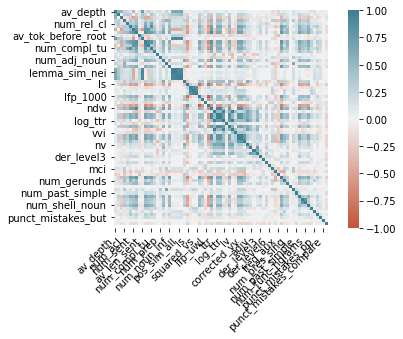

In [9]:
ax = sn.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
import matplotlib.pyplot as plt

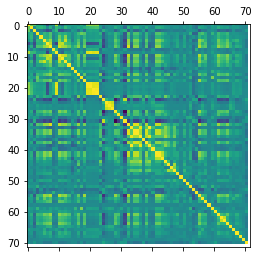

In [11]:
plt.matshow(data.corr())
plt.show()